In [1]:
## Importing  all needed Library

import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt
import plotly as px

In [2]:
## Importing data

df = pd.read_csv("C:/Users/Ankit Pandey/OneDrive/Documents/Desktop/Loan_deafulter/zomato_dataset.csv")

In [3]:
df.head()

,Restaurant Name,Dining Rating,Delivery Rating,Dining Votes,Delivery Votes,Cuisine,Place Name,City,Item Name,Best Seller,Votes,Prices
0,Doner King,3.9,4.2,39,0,Fast Food,Malakpet,Hyderabad,Platter Kebab Combo,BESTSELLER,84,249.0
1,Doner King,3.9,4.2,39,0,Fast Food,Malakpet,Hyderabad,Chicken Rumali Shawarma,BESTSELLER,45,129.0
2,Doner King,3.9,4.2,39,0,Fast Food,Malakpet,Hyderabad,Chicken Tandoori Salad,NaN,39,189.0
3,Doner King,3.9,4.2,39,0,Fast Food,Malakpet,Hyderabad,Chicken BBQ Salad,BESTSELLER,43,189.0
4,Doner King,3.9,4.2,39,0,Fast Food,Malakpet,Hyderabad,Special Doner Wrap Combo,MUST TRY,31,205.0


In [4]:
## Checking null values from the dataset

df.isnull().sum()

Restaurant Name        0
Dining Rating      32236
Delivery Rating     1280
Dining Votes           0
Delivery Votes         0
Cuisine                0
Place Name             0
City                   0
Item Name              0
Best Seller        95715
Votes                  0
Prices                 0
dtype: int64

In [5]:
print(df['Dining Rating'].unique())
print(df['Delivery Rating'].unique())

[3.9 4.3 3.6 4.2 4.4 4.1 4.  nan 3.4 3.2 3.8 3.1 2.7 3.7 3.5 3.  2.9 3.3
 4.6 4.5 2.8 4.7 2.5 2.6 4.8]
[4.2 3.7 4.  3.9 4.1 3.5 4.3 3.8 3.3 nan 4.5 3.6 4.6 3.2 4.4 3.4 3.1 3.
 2.5]


In [6]:
df['Dining Rating'] = df['Dining Rating'].fillna(0)
df['Delivery Rating'] = df['Delivery Rating'].fillna(0)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123657 entries, 0 to 123656
Data columns (total 12 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   Restaurant Name  123657 non-null  object 
 1   Dining Rating    123657 non-null  float64
 2   Delivery Rating  123657 non-null  float64
 3   Dining Votes     123657 non-null  int64  
 4   Delivery Votes   123657 non-null  int64  
 5   Cuisine          123657 non-null  object 
 6   Place Name       123657 non-null  object 
 7   City             123657 non-null  object 
 8   Item Name        123657 non-null  object 
 9   Best Seller      27942 non-null   object 
 10  Votes            123657 non-null  int64  
 11  Prices           123657 non-null  float64
dtypes: float64(3), int64(3), object(6)
memory usage: 11.3+ MB


1) What is the average dining rating across all restaurants in the dataset

(array([32236.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0.,     0.,   418.,  1446.,  5068.,  6623.,  7796., 22140.,
        18709., 24078.,  3427.,  1716.]),
 array([0.  , 0.24, 0.48, 0.72, 0.96, 1.2 , 1.44, 1.68, 1.92, 2.16, 2.4 ,
        2.64, 2.88, 3.12, 3.36, 3.6 , 3.84, 4.08, 4.32, 4.56, 4.8 ]),
 <BarContainer object of 20 artists>)

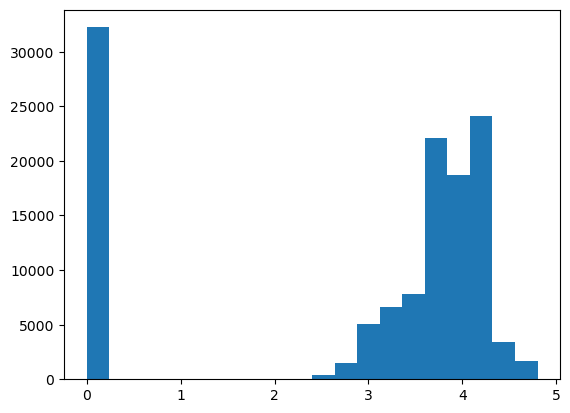

In [8]:
plt.hist(df['Dining Rating'],bins=20)

Data is right skewed and most of dining rating is between 3.5 to 4.5

In [9]:
df['Dining Rating'].mean().round(2)

2.83

2) Which metropolitan area has the highest average delivery rating

In [10]:
df['Delivery Rating'].mean()

3.9221604923295894

In [11]:
df.columns

Index(['Restaurant Name', 'Dining Rating', 'Delivery Rating', 'Dining Votes',
       'Delivery Votes', 'Cuisine ', 'Place Name', 'City', 'Item Name',
       'Best Seller', 'Votes', 'Prices'],
      dtype='object')

In [12]:
city_avg_delivery = df.groupby('City')['Delivery Rating'].mean().sort_values(ascending= False).head(5)

In [13]:
print(city_avg_delivery)

City
Pune            4.006161
Ulsoor          4.000000
Malleshwaram    4.000000
Hyderabad       3.983296
Jaipur          3.979055
Name: Delivery Rating, dtype: float64


In [14]:
Place_name_avg_delivery = df.groupby('Place Name')['Delivery Rating'].mean().sort_values(ascending= False).head(5)

In [15]:
print(Place_name_avg_delivery)

Place Name
Fort Kochi        4.6
Shobha Bazar      4.5
JM Road           4.5
Govind Nagar      4.4
College Street    4.4
Name: Delivery Rating, dtype: float64


3) What is the total number of dining votes received by all restaurants in each city

In [16]:
df.columns

Index(['Restaurant Name', 'Dining Rating', 'Delivery Rating', 'Dining Votes',
       'Delivery Votes', 'Cuisine ', 'Place Name', 'City', 'Item Name',
       'Best Seller', 'Votes', 'Prices'],
      dtype='object')

In [17]:
total_dinning_votes = df.groupby('City')['Dining Votes'].sum().sort_values(ascending= False).reset_index()

In [18]:
print(total_dinning_votes)

             City  Dining Votes
0          Jaipur       3049158
1         Chennai       2608970
2       Hyderabad       2064518
3          Mumbai       1863212
4         Kolkata       1759401
5         Lucknow       1471925
6       Ahmedabad       1456320
7       Bangalore       1422983
8           Kochi       1202972
9            Pune        700977
10      New Delhi        687767
11         Raipur        513906
12            Goa         47370
13   Malleshwaram         32078
14      Banaswadi          4559
15   Magrath Road             0
16         Ulsoor             0


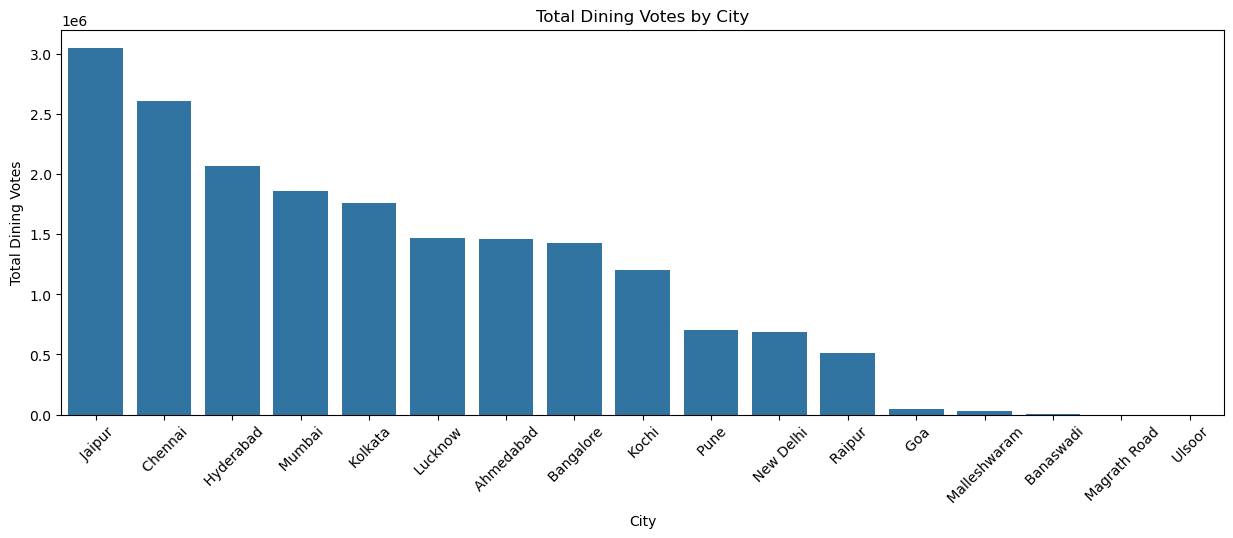

In [19]:
# Plotting the bar plot
plt.figure(figsize=(15,5))
sns.barplot(total_dinning_votes,x='City',y='Dining Votes')
plt.title('Total Dining Votes by City')
plt.xlabel('City')
plt.ylabel('Total Dining Votes')
plt.xticks(rotation=45)
plt.show()

4) How many unique cuisines are represented in the dataset

In [20]:
df.head()

,Restaurant Name,Dining Rating,Delivery Rating,Dining Votes,Delivery Votes,Cuisine,Place Name,City,Item Name,Best Seller,Votes,Prices
0,Doner King,3.9,4.2,39,0,Fast Food,Malakpet,Hyderabad,Platter Kebab Combo,BESTSELLER,84,249.0
1,Doner King,3.9,4.2,39,0,Fast Food,Malakpet,Hyderabad,Chicken Rumali Shawarma,BESTSELLER,45,129.0
2,Doner King,3.9,4.2,39,0,Fast Food,Malakpet,Hyderabad,Chicken Tandoori Salad,NaN,39,189.0
3,Doner King,3.9,4.2,39,0,Fast Food,Malakpet,Hyderabad,Chicken BBQ Salad,BESTSELLER,43,189.0
4,Doner King,3.9,4.2,39,0,Fast Food,Malakpet,Hyderabad,Special Doner Wrap Combo,MUST TRY,31,205.0


In [21]:
df['Cuisine '].nunique()

48

5) Which restaurant has the highest average dining rating in each city

In [22]:
Resturant_dining_rating = df.groupby(['City','Restaurant Name'])['Dining Rating'].mean().sort_values(ascending=False).reset_index()

In [23]:
print(Resturant_dining_rating)

           City            Restaurant Name  Dining Rating
0     New Delhi          Natural Ice Cream            4.8
1       Chennai  AB's - Absolute Barbecues            4.7
2       Chennai                    Toscano            4.7
3        Jaipur             Thali and More            4.7
4     Bangalore                  Brik Oven            4.6
..          ...                        ...            ...
902       Kochi     UBQ by Barbeque Nation            0.0
903       Kochi        Tellicherry Kitchen            0.0
904       Kochi                  Tea Shack            0.0
905   Bangalore              Sandwich Guru            0.0
906      Ulsoor          Dum Safar Biryani            0.0

[907 rows x 3 columns]


C:\Users\Ankit Pandey\AppData\Local\Temp\ipykernel_21628\1213972911.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Dining Rating',y='City',data=Resturant_dining_rating,palette='magma',errorbar=None)


Text(0.5, 1.0, 'Dining Ratings for Restaurants by City')

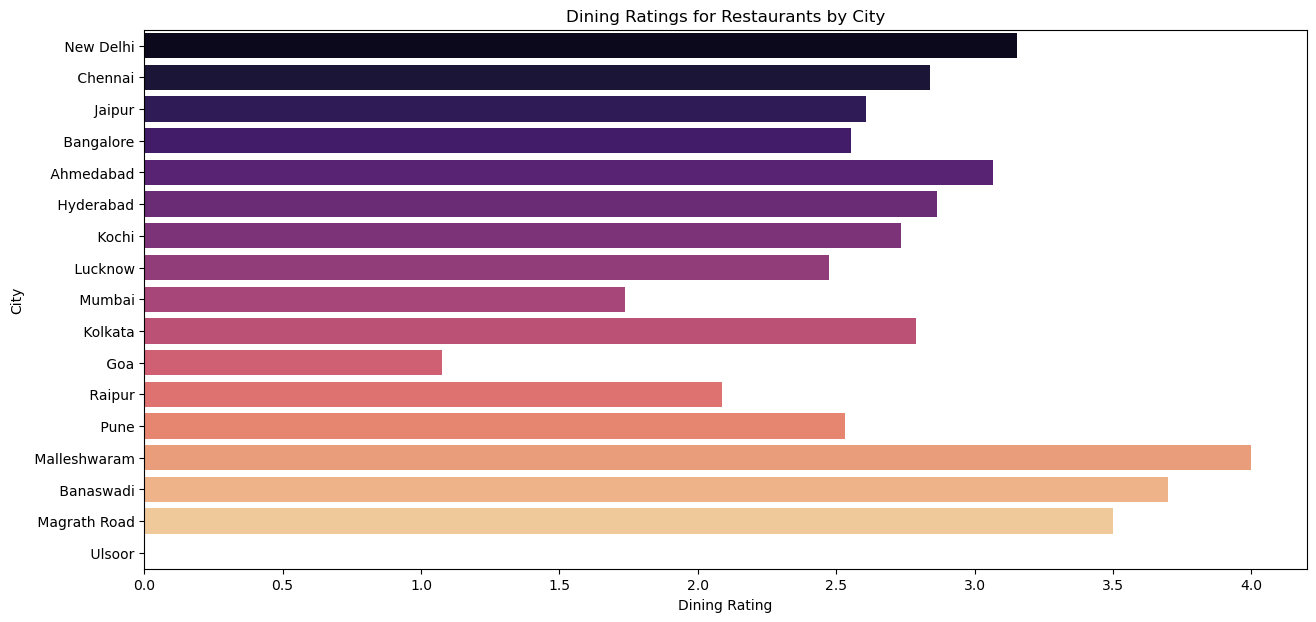

In [24]:
plt.figure(figsize=(15,7))
sns.barplot(x='Dining Rating',y='City',data=Resturant_dining_rating,palette='magma',errorbar=None)
plt.title('Dining Ratings for Restaurants by City')

 What is the average price of the best-selling dishes compared to the non-best-selling dishes

In [25]:
df['Best Seller'].isnull().sum()

95715

In [26]:
df['Best Seller'].unique()

array(['BESTSELLER', nan, 'MUST TRY', "CHEF'S SPECIAL", 'SEASONAL',
       'Not eligible for coupons', 'VEGAN', 'Not on Pro', 'SPICY', 'NEW',
       'GLUTEN FREE', 'DAIRY FREE', 'FODMAP FRIENDLY',
       'Eggless available'], dtype=object)

In [27]:
# Fill missing values in 'Best Seller' with 'No'

df['Best Seller'] = df['Best Seller'].fillna('No')

In [28]:
# Remove rows where 'Cuisine' is 'Beverages' and 'Best Seller' is 'No'

df = df[(df['Cuisine '] != 'Beverages') & (df['Best Seller'] != 'No')] 

In [29]:
df.columns

Index(['Restaurant Name', 'Dining Rating', 'Delivery Rating', 'Dining Votes',
       'Delivery Votes', 'Cuisine ', 'Place Name', 'City', 'Item Name',
       'Best Seller', 'Votes', 'Prices'],
      dtype='object')

In [30]:
Best_selling_dishes = df.groupby(['City','Cuisine '])['Prices'].mean().sort_values(ascending=False).reset_index()

In [31]:
print(Best_selling_dishes)

           City     Cuisine       Prices
0        Ulsoor     Desserts  707.875000
1     Bangalore        Kebab  610.301887
2        Mumbai        Kebab  586.258065
3       Chennai        Pizza  554.480000
4        Mumbai      Chinese  511.067961
..          ...          ...         ...
194   Bangalore    Ice Cream   94.880526
195     Lucknow          Tea   90.714286
196   Bangalore  Street Food   88.785714
197   Bangalore        Pizza   88.625000
198       Kochi    Ice Cream   27.500000

[199 rows x 3 columns]
